# **Introduction**

The current dataset is from kaggle where it contains data of rental properties from Kuala Lumpur and Selangor area. Our objective from this exercise is to:
 1. Build a machine learning model to estimate rental prices based on certain other parameters such as no. of rooms, no of parking, location and etc.
 2. Evaluate which machine learning model is best for our use case

From the dataset we will attempt to perform:
1. Cleaning the data: this include formatting and null values
2. Identifying outlier
3. Choose correct encoding for this data application

# IMPORTING DATASET
1. Import dataset
2. Analyse the dataset
3. Removing unrelated column

In [2]:
import pandas as pd

data = pd.read_csv(r'./mudah-apartment-kl-selangor.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#display the table to observe the data

data.head()

,ads_id,prop_name,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region
0,100323185,The Hipster @ Taman Desa,2022.0,RM 4 200 per month,Kuala Lumpur - Taman Desa,Condominium,5,2.0,6.0,1842 sq.ft.,Fully Furnished,"Minimart, Gymnasium, Security, Playground, Swi...","Air-Cond, Cooking Allowed, Washing Machine",Kuala Lumpur
1,100203973,Segar Courts,NaN,RM 2 300 per month,Kuala Lumpur - Cheras,Condominium,3,1.0,2.0,1170 sq.ft.,Partially Furnished,"Playground, Parking, Barbeque area, Security, ...","Air-Cond, Cooking Allowed, Near KTM/LRT",Kuala Lumpur
2,100323128,Pangsapuri Teratak Muhibbah 2,NaN,RM 1 000 per month,Kuala Lumpur - Taman Desa,Apartment,3,NaN,2.0,650 sq.ft.,Fully Furnished,"Minimart, Jogging Track, Lift, Swimming Pool",NaN,Kuala Lumpur
3,100191767,Sentul Point Suite Apartment,2020.0,RM 1 700 per month,Kuala Lumpur - Sentul,Apartment,2,1.0,2.0,743 sq.ft.,Partially Furnished,"Parking, Playground, Swimming Pool, Squash Cou...","Cooking Allowed, Near KTM/LRT, Washing Machine",Kuala Lumpur
4,97022692,Arte Mont Kiara,NaN,RM 1 299 per month,Kuala Lumpur - Mont Kiara,Service Residence,1,1.0,1.0,494 sq.ft.,Not Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...",Air-Cond,Kuala Lumpur


In [4]:
#delete unrelated column to reduce dimensionality an unrelated data for tis purpose

data = data.drop(['prop_name', 'completion_year', 'property_type', 'furnished', 'facilities', 'additional_facilities', 'region', 'ads_id'], axis=1)

# Format cleaning
1. Cleaning formatting of the rows
2. Cleaning the null values

In [5]:
#Remove non numerical value on 'monthly_rent','size' column and change 'monthly_rent','size','completion_year' the data type to int64

import re

#write a fynction to remove non-numerical, whitespaces in specified column
def clean_numeric_column(value_str):
    """Cleans a string by extracting only the numerical value, removing any spaces, non-numeric characters."""
    if isinstance(value_str, str):
        # Remove any non-numeric characters except spaces between numbers
        value_str = re.sub(r'[^\d\s]', '', value_str).strip()
        # Remove any whitespace between numbers
        value_str = re.sub(r'\s+', '', value_str)
        return value_str
    return value_str  # If it's not a string, return the original value (handles NaN)

# Apply the cleaning function to both 'monthly_rent' and 'size' columns
data['monthly_rent'] = data['monthly_rent'].apply(clean_numeric_column)
data['size'] = data['size'].apply(clean_numeric_column)

# Convert the cleaned columns to numeric
data['monthly_rent'] = pd.to_numeric(data['monthly_rent'], errors='coerce').astype('Int64')
data['size'] = pd.to_numeric(data['size'], errors='coerce').astype('Int64')

In [6]:
#check for null value
data.isnull().sum()

,0
monthly_rent,2
location,0
rooms,6
parking,5702
bathroom,6
size,0


In [7]:
# Show rows where 'rooms' column is null
data[data['rooms'].isnull()]

,monthly_rent,location,rooms,parking,bathroom,size
3668,150,Kuala Lumpur - Sentul,NaN,NaN,NaN,100
8112,100,Kuala Lumpur - Mid Valley City,NaN,NaN,NaN,100
12875,650,Selangor - 43,NaN,1.0,NaN,300
15765,85,Selangor - Seri Kembangan,NaN,1.0,NaN,761
16812,600,Selangor - Kajang,NaN,NaN,NaN,750
16991,150,Selangor - Sungai Buloh,NaN,NaN,NaN,25


In [8]:
# Assume that null value of parking is equal to 0
# Replace null values in the 'parking' column with 0

data['parking'] = data['parking'].fillna(0)
data = data.dropna()

In [9]:
data.isnull().sum()

,0
monthly_rent,0
location,0
rooms,0
parking,0
bathroom,0
size,0


In [10]:
# Remove rows where 'rooms' column contains non-numeric characters
data = data[data['rooms'].str.isdigit()]

# Convert 'rooms' column back to integer type
data['rooms'] = data['rooms'].astype(int)

# Cleaning the Outliers

In [11]:
data.describe()

,monthly_rent,rooms,parking,bathroom,size
count,9987.0,9987.000000,9987.000000,9987.000000,9987.0
mean,2793.643036,2.756784,0.994493,1.953139,10982.872234
std,29713.837342,0.782611,0.747698,0.581963,1000641.106554
min,80.0,1.000000,0.000000,1.000000,1.0
25%,1300.0,2.000000,0.000000,2.000000,800.0
50%,1600.0,3.000000,1.000000,2.000000,913.0
75%,2100.0,3.000000,1.000000,2.000000,1098.0
max,2400000.0,9.000000,10.000000,7.000000,99999999.0


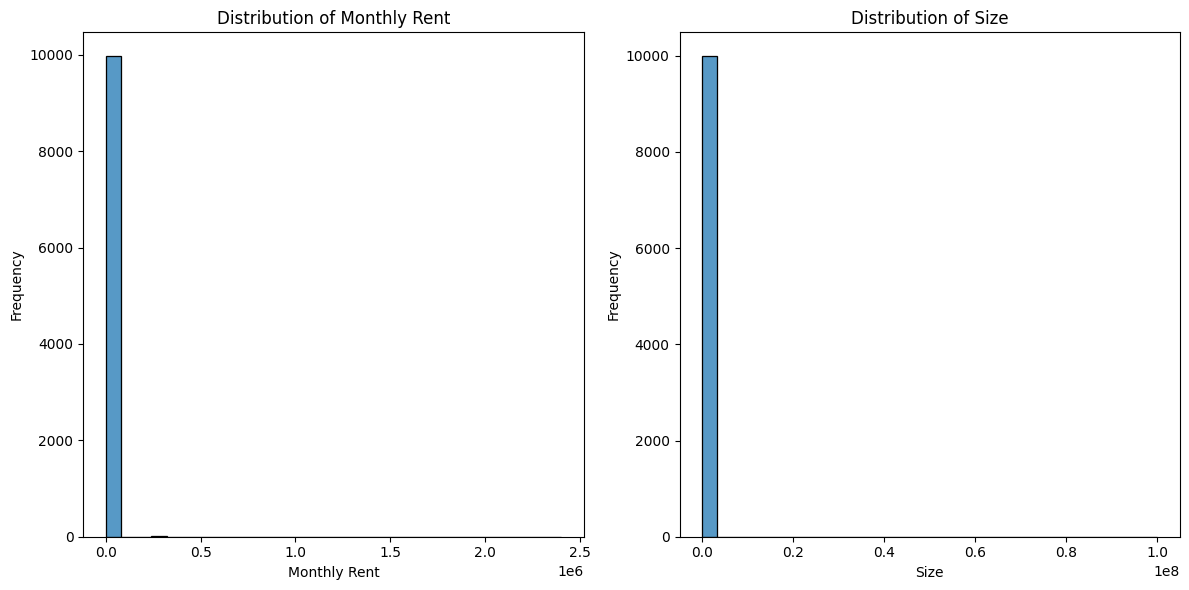

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create distribution plots for 'monthly_rent' and 'size'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['monthly_rent'], kde=False, bins=30)
plt.xlabel('Monthly Rent')
plt.ylabel('Frequency')
plt.title('Distribution of Monthly Rent')

plt.subplot(1, 2, 2)
sns.histplot(data['size'], kde=False, bins=30)
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.title('Distribution of Size')

plt.tight_layout()
plt.show()

In [13]:
# Show rows where 'monthly_rent' is less than 200 or greater than 20000, and 'size' is less than 200 or greater than 20000

data[(data['monthly_rent'] < 200) | (data['monthly_rent'] > 20000) | (data['size'] < 200) | (data['size'] > 20000)]

,monthly_rent,location,rooms,parking,bathroom,size
513,700,Kuala Lumpur - Segambut,6,0.0,3.0,20
555,500,Kuala Lumpur - Cheras,1,0.0,1.0,130
571,329999,Kuala Lumpur - Kepong,4,1.0,2.0,920
637,200,Kuala Lumpur - Setapak,1,1.0,1.0,150
761,750,Kuala Lumpur - Kuchai Lama,1,0.0,1.0,100
...,...,...,...,...,...,...
8642,550000,Kuala Lumpur - Keramat,3,2.0,2.0,1061
9143,550,Kuala Lumpur - Setapak,1,0.0,1.0,80
9387,2000,Kuala Lumpur - Cheras,1,1.0,1.0,1
9544,250000,Kuala Lumpur - Wangsa Maju,2,1.0,1.0,600


In [14]:
# Drop rows where 'monthly_rent' is less than 200 or greater than 20000, and 'size' is less than 200 or greater than 20000

data = data[(data['monthly_rent'] >= 200) & (data['monthly_rent'] <= 20000) & (data['size'] >= 200) & (data['size'] <= 20000)]

In [15]:
data.describe()

,monthly_rent,rooms,parking,bathroom,size
count,9926.0,9926.000000,9926.000000,9926.000000,9926.0
mean,1872.45406,2.761535,0.994963,1.955873,968.412754
std,1116.360419,0.777165,0.741959,0.579992,390.245591
min,250.0,1.000000,0.000000,1.000000,200.0
25%,1300.0,2.000000,0.000000,2.000000,800.0
50%,1600.0,3.000000,1.000000,2.000000,914.0
75%,2100.0,3.000000,1.000000,2.000000,1100.0
max,18500.0,9.000000,9.000000,7.000000,15000.0


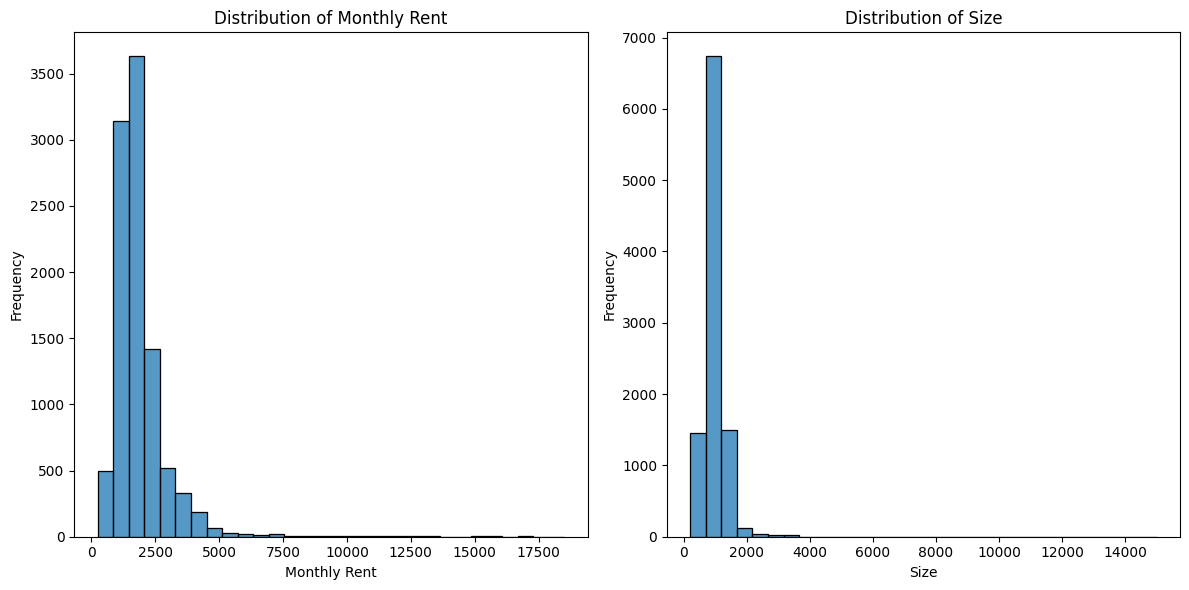

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create distribution plots for 'monthly_rent' and 'size'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['monthly_rent'], kde=False, bins=30)
plt.xlabel('Monthly Rent')
plt.ylabel('Frequency')
plt.title('Distribution of Monthly Rent')

plt.subplot(1, 2, 2)
sns.histplot(data['size'], kde=False, bins=30)
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.title('Distribution of Size')

plt.tight_layout()
plt.show()

In [17]:
# Show rows where 'size' is greater than 6000
data[data['size'] > 6000 ]

,monthly_rent,location,rooms,parking,bathroom,size
2025,1800,Kuala Lumpur - Kepong,3,1.0,2.0,9001
3960,12000,Kuala Lumpur - Ampang Hilir,6,0.0,6.0,6067
4518,3300,Kuala Lumpur - Bangsar,3,1.0,2.0,15000
8703,1400,Kuala Lumpur - Cheras,3,1.0,2.0,8300
8919,18500,Kuala Lumpur - Ampang Hilir,4,3.0,6.0,7506
9408,17000,Kuala Lumpur - KLCC,7,4.0,7.0,7800


In [18]:
# Delete rows where size > 6000 but monthly rent < 10000
data = data[~((data['size'] > 6000) & (data['monthly_rent'] < 10000))]

# Encoding
Perform encodiing on 'location' column since it is categorical data

In [19]:
data.head()

,monthly_rent,location,rooms,parking,bathroom,size
0,4200,Kuala Lumpur - Taman Desa,5,2.0,6.0,1842
1,2300,Kuala Lumpur - Cheras,3,1.0,2.0,1170
2,1000,Kuala Lumpur - Taman Desa,3,0.0,2.0,650
3,1700,Kuala Lumpur - Sentul,2,1.0,2.0,743
4,1299,Kuala Lumpur - Mont Kiara,1,1.0,1.0,494


In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['location_encoded'] = le.fit_transform(data['location'])

# Print the unique encoded values and their corresponding original values
print("Unique Encoded Values:", data['location_encoded'].unique())
print("Original Values:", le.classes_)


Unique Encoded Values: [54 11 43 31 46  0 42 16  9 27 23 58 48 20  3 15 33 26  1  8 19 47 18 38
 52 22 51  6  7 29 21  5 35 36 14  2 57  4 37 28 40 49 32 56 50 55 17 39
 44 25 12 10 34 45 30 41 24 53 13]
Original Values: ['Kuala Lumpur - Ampang' 'Kuala Lumpur - Ampang Hilir'
 'Kuala Lumpur - Bandar Damai Perdana' 'Kuala Lumpur - Bandar Menjalara'
 'Kuala Lumpur - Bandar Tasik Selatan' 'Kuala Lumpur - Bangsar'
 'Kuala Lumpur - Bangsar South' 'Kuala Lumpur - Brickfields'
 'Kuala Lumpur - Bukit Bintang' 'Kuala Lumpur - Bukit Jalil'
 'Kuala Lumpur - Bukit Tunku' 'Kuala Lumpur - Cheras'
 'Kuala Lumpur - City Centre' 'Kuala Lumpur - Damansara'
 'Kuala Lumpur - Damansara Heights' 'Kuala Lumpur - Desa Pandan'
 'Kuala Lumpur - Desa ParkCity' 'Kuala Lumpur - Desa Petaling'
 'Kuala Lumpur - Gombak' 'Kuala Lumpur - Jalan Ipoh'
 'Kuala Lumpur - Jalan Kuching' 'Kuala Lumpur - Jalan Sultan Ismail'
 'Kuala Lumpur - Jinjang' 'Kuala Lumpur - KL City'
 'Kuala Lumpur - KL Eco City' 'Kuala Lumpur - KL Sent

In [21]:
le = LabelEncoder()
data['location_encoded'] = le.fit_transform(data['location'])

# Print the mapping between original location values and their encoded values
for original_value, encoded_value in zip(le.classes_, data['location_encoded'].unique()):
  print(f"{original_value}: {encoded_value}")

Kuala Lumpur - Ampang: 54
Kuala Lumpur - Ampang Hilir: 11
Kuala Lumpur - Bandar Damai Perdana: 43
Kuala Lumpur - Bandar Menjalara: 31
Kuala Lumpur - Bandar Tasik Selatan: 46
Kuala Lumpur - Bangsar: 0
Kuala Lumpur - Bangsar South: 42
Kuala Lumpur - Brickfields: 16
Kuala Lumpur - Bukit Bintang: 9
Kuala Lumpur - Bukit Jalil: 27
Kuala Lumpur - Bukit Tunku: 23
Kuala Lumpur - Cheras: 58
Kuala Lumpur - City Centre: 48
Kuala Lumpur - Damansara: 20
Kuala Lumpur - Damansara Heights: 3
Kuala Lumpur - Desa Pandan: 15
Kuala Lumpur - Desa ParkCity: 33
Kuala Lumpur - Desa Petaling: 26
Kuala Lumpur - Gombak: 1
Kuala Lumpur - Jalan Ipoh: 8
Kuala Lumpur - Jalan Kuching: 19
Kuala Lumpur - Jalan Sultan Ismail: 47
Kuala Lumpur - Jinjang: 18
Kuala Lumpur - KL City: 38
Kuala Lumpur - KL Eco City: 52
Kuala Lumpur - KL Sentral: 22
Kuala Lumpur - KLCC: 51
Kuala Lumpur - Kepong: 6
Kuala Lumpur - Keramat: 7
Kuala Lumpur - Kuchai Lama: 29
Kuala Lumpur - Mid Valley City: 21
Kuala Lumpur - Mont Kiara: 5
Kuala Lumpur

In [22]:
# Shuffle the rows of the DataFrame randomly
data = data.sample(frac=1).reset_index(drop=True)

#Train-Test Split

In [23]:
data.head()

,monthly_rent,location,rooms,parking,bathroom,size,location_encoded
0,2200,Kuala Lumpur - Taman Desa,3,2.0,2.0,958,54
1,1900,Kuala Lumpur - Keramat,3,1.0,2.0,907,28
2,1900,Kuala Lumpur - Solaris Dutamas,3,1.0,2.0,1100,48
3,1000,Kuala Lumpur - Bukit Jalil,3,0.0,2.0,800,9
4,2800,Kuala Lumpur - Sentul,3,0.0,3.0,1200,43


In [24]:
from sklearn.model_selection import train_test_split

#'monthly_rent' is target variable
X = data.drop(columns=['monthly_rent','location'])
y = data['monthly_rent']

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Test ML Algorithm

Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the regression model
regressor = LinearRegression()

# Fit the regression model using the preprocessed training data
regressor.fit(X_train, y_train)

# Make predictions using the preprocessed training and test data
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

# Calculate RMSE
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

print("Training RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

Training RMSE: 802.5718762889759
Test RMSE: 788.3615536360628


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Decision Tree

In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Define the decision tree regressor model
regressor = DecisionTreeRegressor(random_state=42)

# Fit the model using the preprocessed training data
regressor.fit(X_train, y_train)

# Make predictions using the preprocessed training and test data
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

# Calculate RMSE
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

print("Training RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

Training RMSE: 262.0688147610138
Test RMSE: 772.637400728952


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


XGBoost

In [27]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Define the XGBoost regressor model
regressor = XGBRegressor(objective='reg:squarederror', random_state=42)

# Fit the model using the preprocessed training data
regressor.fit(X_train, y_train)

# Make predictions using the preprocessed training and test data
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

# Calculate RMSE
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

print("Training RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

Training RMSE: 396.94889641235335
Test RMSE: 551.0406615428539


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


SVR

In [28]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Define the SVR model
regressor = SVR(kernel='rbf')

# Fit the model
regressor.fit(X_train, y_train)

# Make predictions
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

# Calculate RMSE
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

print("Training RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

Training RMSE: 1082.8943681689602
Test RMSE: 1099.4417146271885


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Gradient Boosting Machine (GBM)

In [29]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Initialize the GBM model
gbm_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Fit the GBM model
gbm_model.fit(X_train, y_train)

# Make predictions
gbm_predictions = gbm_model.predict(X_test)

# Calculate RMSE
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

# Print evaluation metrics for GBM
print("Training RMSE:", train_rmse)
print("Test RMSE:", test_rmse)


Training RMSE: 1082.8943681689602
Test RMSE: 1099.4417146271885


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Forest

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Calculate RMSE
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

# Print evaluation metrics for GBM
print("Training RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

Training RMSE: 1082.8943681689602
Test RMSE: 1099.4417146271885


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Conclusion
Model Performance Summary

1. **XGBoost**:
   - **Test RMSE**: **551.04**
   - This model shows the best overall performance, indicating strong generalization to unseen data. Its training RMSE of **396.95** suggests it captures the underlying patterns without overfitting.

2. **Decision Tree**:
   - **Test RMSE**: **772.64**
   - While it has a low training RMSE of **262.07**, this discrepancy suggests potential overfitting, where the model performs exceptionally well on training data but struggles with new data.

3. **Linear Regression**:
   - **Test RMSE**: **788.36**
   - This model performs moderately compared to others. It provides reasonable predictions, but it does not match the effectiveness of XGBoost or the Decision Tree.

4. **Support Vector Regression (SVR)**, **Gradient Boosting Machine (GBM)**, and **Random Forest**:
   - **Test RMSE**: All three models report high test RMSE values (SVR: **1099.44**, GBM: **1099.44**, Random Forest: **1099.44**).
   - These models underperformed significantly, indicating that they failed to capture the relationships in the data effectively.

**XGBoost** stands out as the most effective model for this dataset, providing the best balance between training and test performance. Its ability to generalize well makes it a strong choice for regression tasks in this context. The Decision Tree, while also performing decently, raises concerns about overfitting, making XGBoost the preferred option for reliable predictions.